In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn import metrics

#models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

# Preparing Dataset

In [ ]:
dataset = pd.read_csv('ADMISSIONS.csv') 

In [ ]:
dataset.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [ ]:
dataset.tail()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0
58975,58598,98813,190264,2131-10-25 03:09:00,2131-10-26 17:44:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,CATHOLIC,MARRIED,WHITE,2131-10-25 00:08:00,2131-10-25 04:35:00,INTRACRANIAL HEMORRHAGE,0,1


In [ ]:
dataset.describe

<bound method NDFrame.describe of        ROW_ID  SUBJECT_ID  ...  HOSPITAL_EXPIRE_FLAG HAS_CHARTEVENTS_DATA
0          21          22  ...                     0                    1
1          22          23  ...                     0                    1
2          23          23  ...                     0                    1
3          24          24  ...                     0                    1
4          25          25  ...                     0                    1
...       ...         ...  ...                   ...                  ...
58971   58594       98800  ...                     0                    1
58972   58595       98802  ...                     1                    1
58973   58596       98805  ...                     0                    1
58974   58597       98813  ...                     0                    0
58975   58598       98813  ...                     0                    1

[58976 rows x 19 columns]>

In [ ]:
list(dataset)

['ROW_ID',
 'SUBJECT_ID',
 'HADM_ID',
 'ADMITTIME',
 'DISCHTIME',
 'DEATHTIME',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'DISCHARGE_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'ETHNICITY',
 'EDREGTIME',
 'EDOUTTIME',
 'DIAGNOSIS',
 'HOSPITAL_EXPIRE_FLAG',
 'HAS_CHARTEVENTS_DATA']

In [ ]:
dataset.drop("ROW_ID", axis = 1, inplace = True)
dataset.drop("SUBJECT_ID", axis = 1, inplace = True)
dataset.drop("DEATHTIME", axis = 1, inplace = True)
dataset.drop("ADMISSION_LOCATION", axis = 1, inplace = True)
dataset.drop("DISCHARGE_LOCATION", axis = 1, inplace = True)
dataset.drop("INSURANCE", axis = 1, inplace = True)
dataset.drop("LANGUAGE", axis = 1, inplace = True)
dataset.drop("RELIGION", axis = 1, inplace = True)
dataset.drop("MARITAL_STATUS", axis = 1, inplace = True)
dataset.drop("ETHNICITY", axis = 1, inplace = True)
dataset.drop("EDREGTIME", axis = 1, inplace = True)
dataset.drop("EDOUTTIME", axis = 1, inplace = True)
dataset.drop("DIAGNOSIS", axis = 1, inplace = True)
dataset.drop("HOSPITAL_EXPIRE_FLAG", axis = 1, inplace = True)
dataset.drop("HAS_CHARTEVENTS_DATA", axis = 1, inplace = True)


In [ ]:
list(dataset)

['HADM_ID', 'ADMITTIME', 'DISCHTIME', 'ADMISSION_TYPE']

In [ ]:
dataset.head()

,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE
0,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY
1,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE
2,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY
3,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY
4,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY


In [ ]:
#dataset = dataset[dataset['ADMISSION_TYPE'] == 'EMERGENCY']

In [ ]:
dataset.drop("ADMISSION_TYPE", axis = 1, inplace = True)

In [ ]:
dataset.head()

,HADM_ID,ADMITTIME,DISCHTIME
0,165315,2196-04-09 12:26:00,2196-04-10 15:54:00
1,152223,2153-09-03 07:15:00,2153-09-08 19:10:00
2,124321,2157-10-18 19:34:00,2157-10-25 14:00:00
3,161859,2139-06-06 16:14:00,2139-06-09 12:48:00
4,129635,2160-11-02 02:06:00,2160-11-05 14:55:00


In [ ]:
dataset.shape

(58976, 3)

In [ ]:
print('Dataset has {} number of unique admission events.'.format(dataset['HADM_ID'].nunique()))

Dataset has 58976 number of unique admission events.


# Data Preprocessing

In [ ]:
# Convert admission and discharge times to datetime type
dataset['ADMITTIME'] = pd.to_datetime(dataset['ADMITTIME'])

In [ ]:
dataset.head()

,HADM_ID,ADMITTIME,DISCHTIME
0,165315,2196-04-09 12:26:00,2196-04-10 15:54:00
1,152223,2153-09-03 07:15:00,2153-09-08 19:10:00
2,124321,2157-10-18 19:34:00,2157-10-25 14:00:00
3,161859,2139-06-06 16:14:00,2139-06-09 12:48:00
4,129635,2160-11-02 02:06:00,2160-11-05 14:55:00


In [ ]:
#dataset['Period'] = dataset['INTIME'].dt.to_period('M')

In [ ]:
dataset['ADMITTIME'] = dataset['ADMITTIME'].dt.date
dataset['ADMITTIME'] = pd.to_datetime(dataset['ADMITTIME'])

In [ ]:
dataset_new = pd.pivot_table(dataset, values='HADM_ID',
                   columns=['ADMITTIME'], aggfunc=np.count_nonzero)

In [ ]:
dataset_new

ADMITTIME,2100-06-07,2100-06-09,2100-06-14,2100-06-22,2100-06-24,2100-06-28,2100-07-01,2100-07-02,2100-07-04,2100-07-05,2100-07-07,2100-07-09,2100-07-11,2100-07-14,2100-07-16,2100-07-18,2100-07-21,2100-07-23,2100-07-26,2100-07-27,2100-07-29,2100-07-31,2100-08-01,2100-08-02,2100-08-03,2100-08-04,2100-08-06,2100-08-08,2100-08-09,2100-08-10,2100-08-11,2100-08-12,2100-08-13,2100-08-16,2100-08-18,2100-08-19,2100-08-20,2100-08-22,2100-08-24,2100-08-25,...,2206-01-08,2206-01-17,2206-01-25,2206-02-07,2206-02-11,2206-02-27,2206-03-15,2206-03-24,2206-04-08,2206-04-17,2206-05-02,2206-05-14,2206-05-28,2206-05-30,2206-06-09,2206-06-13,2206-06-18,2206-06-28,2206-07-27,2206-08-19,2206-08-24,2206-10-05,2206-10-20,2206-11-20,2206-12-31,2207-02-27,2207-03-10,2207-04-24,2207-06-16,2207-08-16,2207-12-13,2208-01-21,2208-04-27,2208-04-29,2208-05-27,2208-08-19,2209-02-09,2209-07-14,2209-07-31,2210-08-17
HADM_ID,1,1,2,1,1,1,1,2,1,3,1,3,2,4,3,2,1,1,3,1,1,1,1,2,3,1,3,3,1,3,2,2,1,3,1,2,1,2,3,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
dataset_new = dataset_new.T

In [ ]:
dataset_new.head()

,HADM_ID
ADMITTIME,
2100-06-07,1
2100-06-09,1
2100-06-14,2
2100-06-22,1
2100-06-24,1


In [ ]:
dataset_new = dataset_new.rename(columns={ "HADM_ID": "Admissions"})

In [ ]:
list(dataset_new.index)

[Timestamp('2100-06-07 00:00:00'),
 Timestamp('2100-06-09 00:00:00'),
 Timestamp('2100-06-14 00:00:00'),
 Timestamp('2100-06-22 00:00:00'),
 Timestamp('2100-06-24 00:00:00'),
 Timestamp('2100-06-28 00:00:00'),
 Timestamp('2100-07-01 00:00:00'),
 Timestamp('2100-07-02 00:00:00'),
 Timestamp('2100-07-04 00:00:00'),
 Timestamp('2100-07-05 00:00:00'),
 Timestamp('2100-07-07 00:00:00'),
 Timestamp('2100-07-09 00:00:00'),
 Timestamp('2100-07-11 00:00:00'),
 Timestamp('2100-07-14 00:00:00'),
 Timestamp('2100-07-16 00:00:00'),
 Timestamp('2100-07-18 00:00:00'),
 Timestamp('2100-07-21 00:00:00'),
 Timestamp('2100-07-23 00:00:00'),
 Timestamp('2100-07-26 00:00:00'),
 Timestamp('2100-07-27 00:00:00'),
 Timestamp('2100-07-29 00:00:00'),
 Timestamp('2100-07-31 00:00:00'),
 Timestamp('2100-08-01 00:00:00'),
 Timestamp('2100-08-02 00:00:00'),
 Timestamp('2100-08-03 00:00:00'),
 Timestamp('2100-08-04 00:00:00'),
 Timestamp('2100-08-06 00:00:00'),
 Timestamp('2100-08-08 00:00:00'),
 Timestamp('2100-08-

In [ ]:
ds = dataset_new.index.to_series()
dataset_new['MONTH'] = ds.dt.month
dataset_new['DAY_OF_WEEK'] = ds.dt.dayofweek
dataset_new['DATE'] = ds.dt.day
dataset_new['YEAR'] = ds.dt.year

In [ ]:
dataset_new.head()

,Admissions,MONTH,DAY_OF_WEEK,DATE,YEAR
ADMITTIME,,,,,
2100-06-07,1,6,0,7,2100
2100-06-09,1,6,2,9,2100
2100-06-14,2,6,0,14,2100
2100-06-22,1,6,1,22,2100
2100-06-24,1,6,3,24,2100


In [ ]:
df = dataset_new[['Admissions', 'DAY_OF_WEEK', 'DATE', 'MONTH', 'YEAR']]
df

,Admissions,DAY_OF_WEEK,DATE,MONTH,YEAR
ADMITTIME,,,,,
2100-06-07,1,0,7,6,2100
2100-06-09,1,2,9,6,2100
2100-06-14,2,0,14,6,2100
2100-06-22,1,1,22,6,2100
2100-06-24,1,3,24,6,2100
...,...,...,...,...,...
2208-08-19,1,4,19,8,2208
2209-02-09,1,3,9,2,2209
2209-07-14,1,4,14,7,2209


In [ ]:
dataset_new['MONTH'].dtypes

dtype('int64')

# Data Exploration

## Year

      Admissions
YEAR            
2100         135
2101         280
2102         279
2103         294
2104         279
...          ...
2206          25
2207           6
2208           5
2209           3
2210           1

[111 rows x 1 columns]


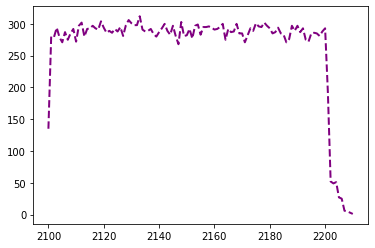

In [ ]:
year = pd.pivot_table(dataset_new, values='Admissions',
                   columns=['YEAR'], aggfunc=np.count_nonzero)
year = year.T
print(year)
plt.plot(year.index, year.Admissions, color='purple', linestyle='dashed', linewidth=2)

##Day

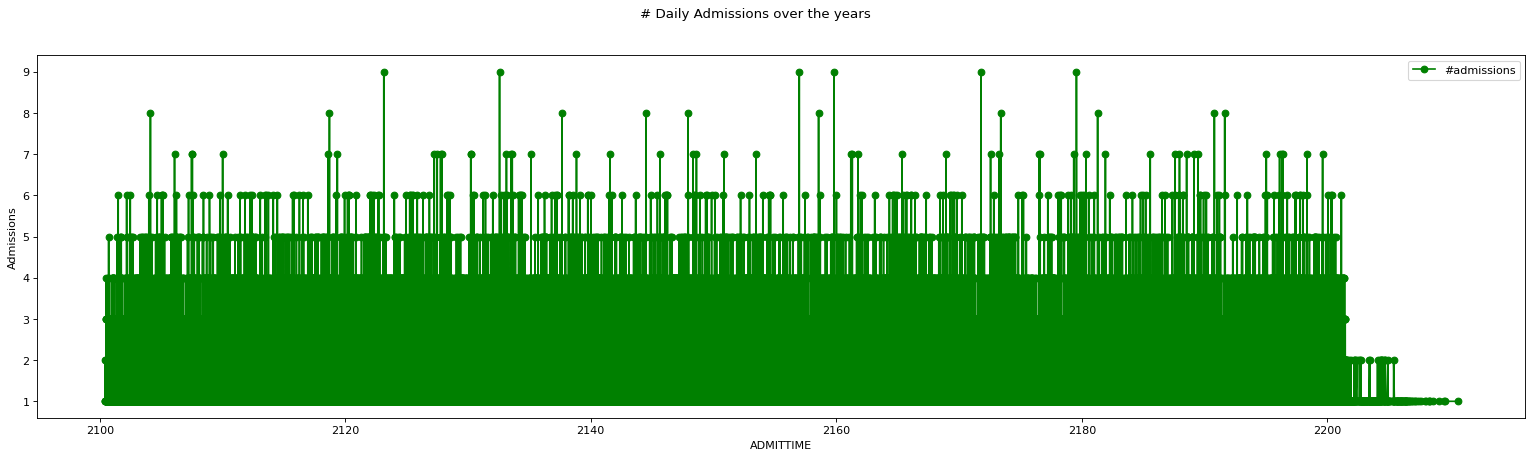

In [ ]:
fig = plt.figure(figsize=(24, 6), dpi=80)
fig.suptitle('# Daily Admissions over the years ')
plt.xlabel('ADMITTIME')
plt.ylabel('Admissions')
actual, = plt.plot(dataset_new.index, dataset_new.Admissions, 'go-', label='#admissions')
plt.legend(handles=[actual])
plt.show()

In [ ]:
dataset_new['DAY_OF_WEEK'] = dataset_new['DAY_OF_WEEK'].apply(str)

In [ ]:
dataset_new['DAY'] = dataset_new['DAY_OF_WEEK'].replace({'0': 'SUNDAY', '1': 'MONDAY', '2': 'TUESDAY', '3': 'WEDNESDAY', '4': 'THURSDAY', '5': 'FRIDAY', '6': 'SATURDAY'})

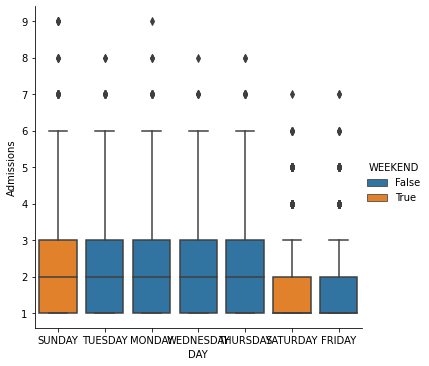

In [ ]:
dataset_new["WEEKEND"] = dataset_new["DAY"].isin(["SATURDAY", "SUNDAY"])
sns.catplot(x="DAY", y="Admissions", hue='WEEKEND',
            kind="box", dodge=False, data=dataset_new)

## Checking for Kurtosis, skewness
https://towardsdatascience.com/testing-for-normality-using-skewness-and-kurtosis-afd61be860


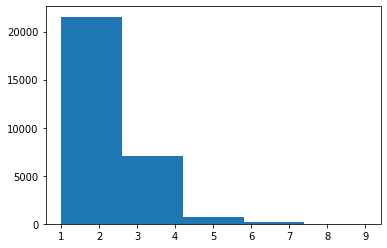

In [ ]:
plt.hist(dataset_new['Admissions'], bins=5)
plt.show()

In [ ]:
from statsmodels.stats.stattools import jarque_bera as jb
from statsmodels.stats.stattools import omni_normtest as omb
from statsmodels.compat import lzip

print('Mean='+str(round(dataset_new['Admissions'].mean(), 2)))
print('Median='+str(round(dataset_new['Admissions'].median(), 2)))
name = ['Jarque-Bera', 'Chi^2 two-tail probability', 'Skewness', 'Kurtosis']
test_results = jb(dataset_new['Admissions'])
lzip(name, test_results)

Mean=2.0
Median=2.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[('Jarque-Bera', 10965.562521406437),
 ('Chi^2 two-tail probability', 0.0),
 ('Skewness', 1.230761411364749),
 ('Kurtosis', 4.694706982148041)]

In [ ]:
#Add a column to the Data Frame that contains log(Admissions):
dataset_new['LOG_ADMISSION_COUNT'] = np.log(dataset_new['Admissions'])
#All another column containing sqrt(BB_COUNT)
dataset_new['SQRT_ADMISSION_COUNT'] = np.sqrt(dataset_new['Admissions'])

In [ ]:
dataset_new.head()

,Admissions,MONTH,DAY_OF_WEEK,DATE,YEAR,DAY,WEEKEND,LOG_ADMISSION_COUNT,SQRT_ADMISSION_COUNT
ADMITTIME,,,,,,,,,
2100-06-07,1,6,0,7,2100,SUNDAY,True,0.000000,1.000000
2100-06-09,1,6,2,9,2100,TUESDAY,False,0.000000,1.000000
2100-06-14,2,6,0,14,2100,SUNDAY,True,0.693147,1.414214
2100-06-22,1,6,1,22,2100,MONDAY,False,0.000000,1.000000
2100-06-24,1,6,3,24,2100,WEDNESDAY,False,0.000000,1.000000


In [ ]:
name = ['Jarque-Bera', 'Chi^2 two-tail probability', 'Skewness', 'Kurtosis']
test_results = omb(dataset_new['LOG_ADMISSION_COUNT'])
lzip(name, test_results)


[('Jarque-Bera', 11837.849084067439), ('Chi^2 two-tail probability', 0.0)]

In [ ]:
test_results = omb(dataset_new['SQRT_ADMISSION_COUNT'])
lzip(name, test_results)

[('Jarque-Bera', 2005.914754932937), ('Chi^2 two-tail probability', 0.0)]

## Month

In [ ]:
dataset_new['MONTH'] = dataset_new['MONTH'].apply(str)

In [ ]:
dataset_new['MONTH'] = dataset_new['MONTH'].replace({'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May', '6': 'Jun', '7': 'July', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'})

In [ ]:
dataset_new.head()

,Admissions,MONTH,DAY_OF_WEEK,DATE,YEAR,DAY,WEEKEND,LOG_ADMISSION_COUNT,SQRT_ADMISSION_COUNT
ADMITTIME,,,,,,,,,
2100-06-07,1,Jun,0,7,2100,SUNDAY,True,0.000000,1.000000
2100-06-09,1,Jun,2,9,2100,TUESDAY,False,0.000000,1.000000
2100-06-14,2,Jun,0,14,2100,SUNDAY,True,0.693147,1.414214
2100-06-22,1,Jun,1,22,2100,MONDAY,False,0.000000,1.000000
2100-06-24,1,Jun,3,24,2100,WEDNESDAY,False,0.000000,1.000000


       Admissions
MONTH            
Apr          2393
Aug          2544
Dec          2473
Feb          2274
Jan          2516
July         2534
Jun          2441
Mar          2510
May          2475
Nov          2410
Oct          2481
Sep          2416


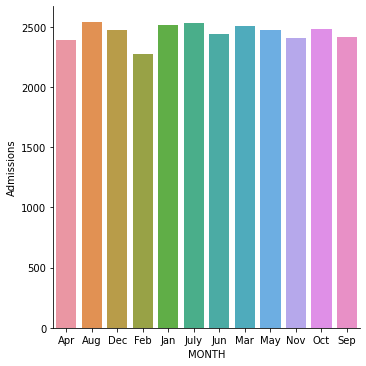

In [ ]:
month = pd.pivot_table(dataset_new, values='Admissions',
                   columns=['MONTH'], aggfunc=np.count_nonzero)
month = month.T
print(month)
sns.catplot(x=month.index, y="Admissions", kind="bar", data=month)

In [ ]:
dataset_new.head()

,Admissions,MONTH,DAY_OF_WEEK,DATE,YEAR,DAY,WEEKEND,LOG_ADMISSION_COUNT,SQRT_ADMISSION_COUNT
ADMITTIME,,,,,,,,,
2100-06-07,1,Jun,0,7,2100,SUNDAY,True,0.000000,1.000000
2100-06-09,1,Jun,2,9,2100,TUESDAY,False,0.000000,1.000000
2100-06-14,2,Jun,0,14,2100,SUNDAY,True,0.693147,1.414214
2100-06-22,1,Jun,1,22,2100,MONDAY,False,0.000000,1.000000
2100-06-24,1,Jun,3,24,2100,WEDNESDAY,False,0.000000,1.000000


#Modelling

## Dialy Admissions Prediction

In [ ]:
df['ADMISSION'] = dataset_new.Admissions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head(5)

,Admissions,DAY_OF_WEEK,DATE,MONTH,YEAR,ADMISSION
ADMITTIME,,,,,,
2100-06-07,1,0,7,6,2100,1
2100-06-09,1,2,9,6,2100,1
2100-06-14,2,0,14,6,2100,2
2100-06-22,1,1,22,6,2100,1
2100-06-24,1,3,24,6,2100,1


In [ ]:
df.drop('Admissions', axis=1, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,DAY_OF_WEEK,DATE,MONTH,YEAR,ADMISSION
ADMITTIME,,,,,
2100-06-07,0,7,6,2100,1
2100-06-09,2,9,6,2100,1
2100-06-14,0,14,6,2100,2
2100-06-22,1,22,6,2100,1
2100-06-24,3,24,6,2100,1
...,...,...,...,...,...
2208-08-19,4,19,8,2208,1
2209-02-09,3,9,2,2209,1
2209-07-14,4,14,7,2209,1


In [ ]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=23576
Testing data set length=5891


In [ ]:
expr = 'ADMISSION ~ DAY_OF_WEEK  + DATE + MONTH + YEAR'
expr

'ADMISSION ~ DAY_OF_WEEK  + DATE + MONTH + YEAR'

In [ ]:
from patsy import dmatrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [ ]:
X_train.head(5)

,Intercept,DAY_OF_WEEK,DATE,MONTH,YEAR
ADMITTIME,,,,,
2100-06-07,1.0,0.0,7.0,6.0,2100.0
2100-06-09,1.0,2.0,9.0,6.0,2100.0
2100-06-14,1.0,0.0,14.0,6.0,2100.0
2100-06-22,1.0,1.0,22.0,6.0,2100.0
2100-06-24,1.0,3.0,24.0,6.0,2100.0


In [ ]:
X_test.head(5)

,Intercept,DAY_OF_WEEK,DATE,MONTH,YEAR
ADMITTIME,,,,,
2100-06-28,1.0,0.0,28.0,6.0,2100.0
2100-07-09,1.0,4.0,9.0,7.0,2100.0
2100-07-27,1.0,1.0,27.0,7.0,2100.0
2100-08-12,1.0,3.0,12.0,8.0,2100.0
2100-08-16,1.0,0.0,16.0,8.0,2100.0


OLSR MODEL

In [ ]:
import statsmodels.formula.api as smf
olsr_results = smf.ols(expr, df_train).fit()
olsr_results.params

Intercept      3.466862
DAY_OF_WEEK   -0.078239
DATE          -0.000240
MONTH         -0.002219
YEAR          -0.000569
dtype: float64

In [ ]:
print(olsr_results.summary())


                            OLS Regression Results                            
Dep. Variable:              ADMISSION   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     118.7
Date:                Thu, 13 May 2021   Prob (F-statistic):          2.00e-100
Time:                        02:57:42   Log-Likelihood:                -35658.
No. Observations:               23576   AIC:                         7.133e+04
Df Residuals:                   23571   BIC:                         7.137e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.4669      0.526      6.597      

In [ ]:
olsr_predictions = olsr_results.get_prediction(X_test)

In [ ]:
ypred = olsr_results.predict(X_test)
print(ypred)

ADMITTIME
2100-06-28    2.252538
2100-07-09    1.941914
2100-07-27    2.172319
2100-08-12    2.017215
2100-08-16    2.250974
                ...   
2206-03-24    2.199870
2206-07-27    1.720841
2206-08-24    1.719340
2206-11-20    1.948357
2208-05-27    1.880620
Length: 5891, dtype: float64


In [ ]:
mse_daily_model = mean_squared_error(y_test,ypred)
mae_daily_model = mean_absolute_error(y_test,ypred)

print("Daily Model | MAE ", mse_daily_model)
print("Daily Model | MSE ", mae_daily_model)

Daily Model | MAE  1.1992245284927137
Daily Model | MSE  0.8536680924809923


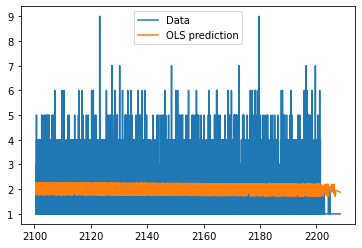

In [ ]:
fig, ax = plt.subplots()
ax.plot(X_test.index, y_test, label="Data")
#ax.plot(x1, y_true, 'b-', label="True")
ax.plot(X_test.index, ypred, label="OLS prediction")
ax.legend(loc="best");

In [ ]:
predictions_summary_frame = olsr_predictions.summary_frame()
print(predictions_summary_frame)
print(predictions_summary_frame.columns)

          mean   mean_se  ...  obs_ci_lower  obs_ci_upper
0     2.252538  0.020399  ...      0.099706      4.405369
1     1.941914  0.015890  ...     -0.210772      4.094600
2     2.172319  0.018359  ...      0.019557      4.325080
3     2.017215  0.014964  ...     -0.135445      4.169876
4     2.250974  0.017989  ...      0.098224      4.403723
...        ...       ...  ...           ...           ...
5886  2.199870  0.020839  ...      0.047022      4.352718
5887  1.720841  0.021053  ...     -0.432015      3.873697
5888  1.719340  0.020340  ...     -0.433490      3.872170
5889  1.948357  0.018225  ...     -0.204400      4.101114
5890  1.880620  0.018800  ...     -0.272156      4.033396

[5891 rows x 6 columns]
Index(['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower',
       'obs_ci_upper'],
      dtype='object')


In [ ]:
mean_error = predictions_summary_frame['mean_se'].mean()
mean_error

0.015710090519204207

<Figure size 432x288 with 0 Axes>

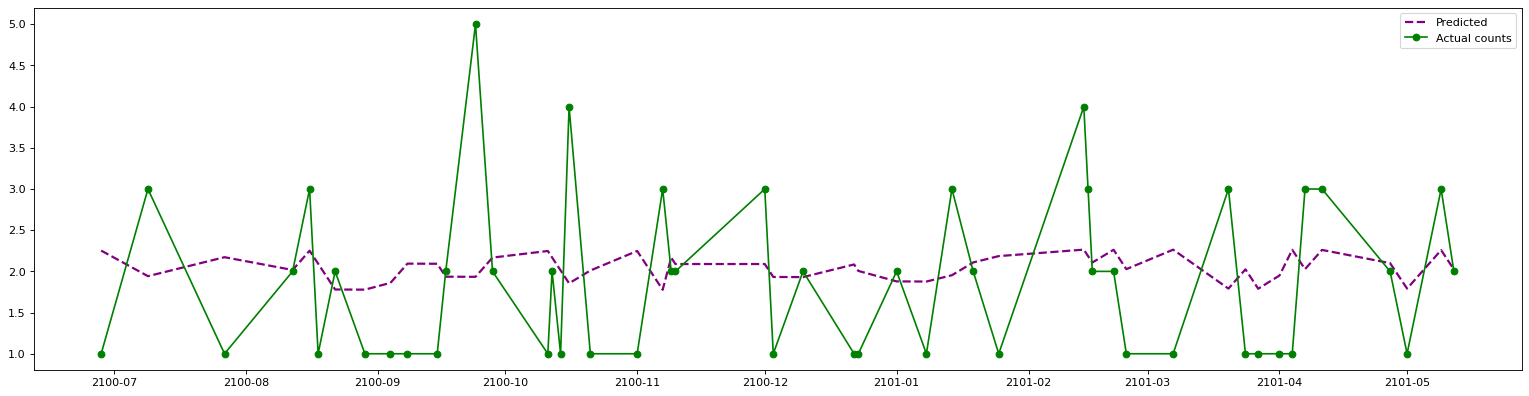

In [ ]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['ADMISSION']

fig = plt.figure()
plt.figure(figsize=(24, 6), dpi=80)
fig.suptitle('Predicted and Actual Daily Admissions ')
predicted, = plt.plot(X_test.index[:50], predicted_counts[:50], color='purple', linestyle='dashed', linewidth=2, label = 'Predicted')
actual, = plt.plot(X_test.index[:50], actual_counts[:50], 'go-', label='Actual counts')
plt.legend(handles=[predicted, actual])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


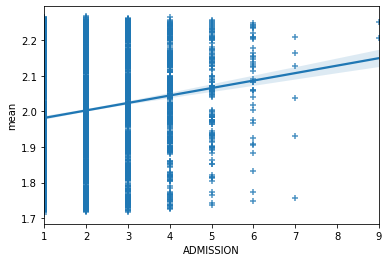

In [ ]:
sns.regplot(actual_counts, predicted_counts, marker="+")

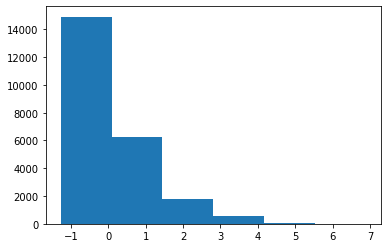

In [ ]:
plt.hist(olsr_results.resid, bins=6)
plt.show()

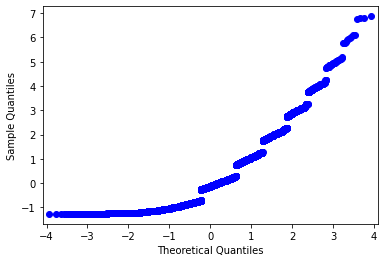

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(olsr_results.resid)
plt.show()

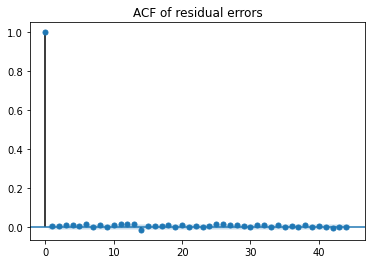

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(olsr_results.resid, title='ACF of residual errors')
plt.show()

## Monthly Admission Prediction

##Month Model

In [ ]:
df_month = dataset_new[['MONTH', 'Admissions']]
df_month['Period'] = df_month.index.to_period('M')
df_month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MONTH,Admissions,Period
ADMITTIME,,,
2100-06-07,Jun,1,2100-06
2100-06-09,Jun,1,2100-06
2100-06-14,Jun,2,2100-06
2100-06-22,Jun,1,2100-06
2100-06-24,Jun,1,2100-06
...,...,...,...
2208-08-19,Aug,1,2208-08
2209-02-09,Feb,1,2209-02
2209-07-14,July,1,2209-07


In [ ]:
df_month = pd.pivot_table(df_month, values='Admissions',
                   columns=['Period'], aggfunc=np.sum)
df_month = df_month.T
df_month

,Admissions
Period,
2100-06,7
2100-07,30
2100-08,43
2100-09,51
2100-10,37
...,...
2208-05,1
2208-08,1
2209-02,1


In [ ]:
df_month['Month'] = df_month.index.month
df_month

,Admissions,Month
Period,,
2100-06,7,6
2100-07,30,7
2100-08,43,8
2100-09,51,9
2100-10,37,10
...,...,...
2208-05,1,5
2208-08,1,8
2209-02,1,2


In [ ]:
df_month['Month'] = df_month['Month'].apply(str)
df_month['Month'] = df_month['Month'].replace({'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May', '6': 'Jun', '7': 'July', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'})
df_month

,Admissions,Month
Period,,
2100-06,7,Jun
2100-07,30,July
2100-08,43,Aug
2100-09,51,Sep
2100-10,37,Oct
...,...,...
2208-05,1,May
2208-08,1,Aug
2209-02,1,Feb


In [ ]:
df_month.index = df_month.index.to_series().astype(str)

In [ ]:
df_month = pd.get_dummies(df_month, columns=['Month'])
df_month

,Admissions,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
Period,,,,,,,,,,,,,
2100-06,7,0,0,0,0,0,0,1,0,0,0,0,0
2100-07,30,0,0,0,0,0,1,0,0,0,0,0,0
2100-08,43,0,1,0,0,0,0,0,0,0,0,0,0
2100-09,51,0,0,0,0,0,0,0,0,0,0,0,1
2100-10,37,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208-05,1,0,0,0,0,0,0,0,0,1,0,0,0
2208-08,1,0,1,0,0,0,0,0,0,0,0,0,0
2209-02,1,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
mask_month = np.random.rand(len(df_month)) < 0.8
df_train_month = df_month[mask_month]
df_test_month = df_month[~mask_month]
print('Training data set length='+str(len(df_train_month)))
print('Testing data set length='+str(len(df_test_month)))

Training data set length=1046
Testing data set length=245


In [ ]:
# df_train_month.index = df_train_month.index.to_series().astype(str)
# df_test_month.index = df_test_month.index.to_series().astype(str)


In [ ]:
print(df_train_month.shape)
print(df_test_month.shape)

(1046, 13)
(245, 13)


In [ ]:
expr_month = 'Admissions ~ Month_Apr  + Month_Aug + Month_Dec + Month_Feb + Month_Jan + Month_July + Month_Jun + Month_Mar + Month_May + Month_Nov + Month_Oct +  Month_Sep'
expr_month

'Admissions ~ Month_Apr  + Month_Aug + Month_Dec + Month_Feb + Month_Jan + Month_July + Month_Jun + Month_Mar + Month_May + Month_Nov + Month_Oct +  Month_Sep'

In [ ]:
y_train_month, X_train_month = dmatrices(expr_month, df_train_month, return_type='dataframe')
y_test_month, X_test_month = dmatrices(expr_month, df_test_month, return_type='dataframe')

In [ ]:
X_train_month.columns

Index(['Intercept', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jan', 'Month_July', 'Month_Jun', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')

In [ ]:
X_train_month.drop('Intercept', axis=1, inplace=True)
X_test_month.drop('Intercept', axis=1, inplace=True)

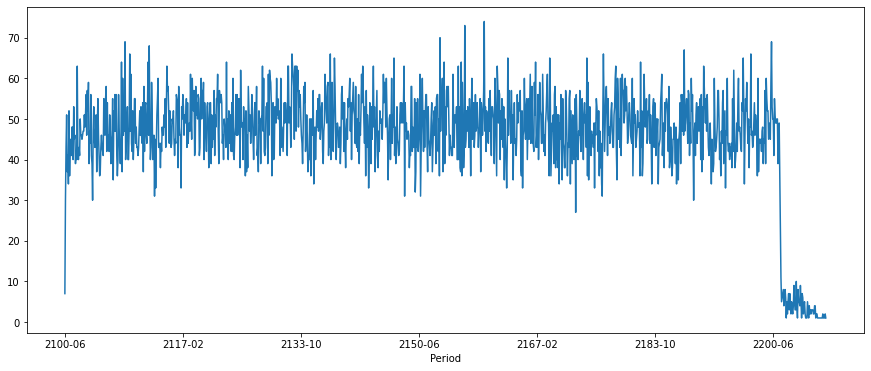

In [ ]:
df_month.Admissions.plot(figsize=(15, 6))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    #Determing rolling statistics
  rolmean = pd.Series(ts).rolling(window=5).mean()
  rolstd = pd.Series(ts).rolling(window=5).std()
#Plot rolling statistics:
  plt.plot(ts, color='blue',label='Original')
  plt.plot(rolmean, color='red', label='Rolling Mean')
  plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()
    #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(ts, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

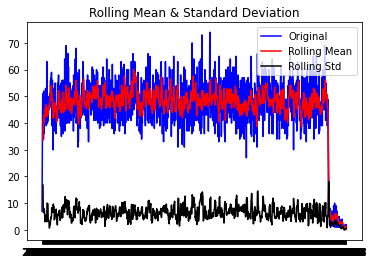

Results of Dickey-Fuller Test:
Test Statistic                   -0.429947
p-value                           0.904977
#Lags Used                       13.000000
Number of Observations Used    1277.000000
Critical Value (1%)              -3.435481
dtype: float64
Test Statistic                   -0.429947
p-value                           0.904977
#Lags Used                       13.000000
Number of Observations Used    1277.000000
Critical Value (1%)              -3.435481
Critical Value (5%)              -2.863806
dtype: float64
Test Statistic                   -0.429947
p-value                           0.904977
#Lags Used                       13.000000
Number of Observations Used    1277.000000
Critical Value (1%)              -3.435481
Critical Value (5%)              -2.863806
Critical Value (10%)             -2.567976
dtype: float64


In [ ]:
test_stationarity(df_month.Admissions)

In [ ]:
olsr_month_results = smf.ols(expr_month, df_train_month).fit()
olsr_month_results.params

Intercept     42.217966
Month_Apr      2.633098
Month_Aug      3.299681
Month_Dec      3.682034
Month_Feb     -0.265585
Month_Jan      5.298517
Month_July     6.372395
Month_Jun      2.322264
Month_Mar      4.838852
Month_May      3.177383
Month_Nov      2.271164
Month_Oct      4.119383
Month_Sep      4.468781
dtype: float64

In [ ]:
print(olsr_month_results.summary())

                            OLS Regression Results                            
Dep. Variable:             Admissions   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.598
Date:                Thu, 13 May 2021   Prob (F-statistic):             0.0937
Time:                        02:57:56   Log-Likelihood:                -4127.0
No. Observations:                1046   AIC:                             8278.
Df Residuals:                    1034   BIC:                             8337.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.2180      0.359    117.455      0.0

In [ ]:
olsr_month_predictions = olsr_month_results.get_prediction(X_test_month)
olsr_month_predictions

In [ ]:
predictions_summary_frame_monthly = olsr_month_predictions.summary_frame()
print(predictions_summary_frame_monthly)


          mean   mean_se  ...  obs_ci_lower  obs_ci_upper
0    46.686747  1.381134  ...     21.847856     71.525638
1    41.952381  1.372888  ...     17.115250     66.789511
2    44.851064  1.297809  ...     20.029481     69.672647
3    46.686747  1.381134  ...     21.847856     71.525638
4    41.952381  1.372888  ...     17.115250     66.789511
..         ...       ...  ...           ...           ...
240  46.686747  1.381134  ...     21.847856     71.525638
241  44.540230  1.349010  ...     19.708138     69.372322
242  45.900000  1.326336  ...     21.072611     70.727389
243  47.516484  1.319028  ...     22.690594     72.342373
244  41.952381  1.372888  ...     17.115250     66.789511

[245 rows x 6 columns]


In [ ]:
mse_month_model = mean_squared_error(y_test_month, predictions_summary_frame_monthly['mean'])
mae_month_model = mean_absolute_error(y_test_month,predictions_summary_frame_monthly['mean'])

print("Monthly Model | MAE ", mse_month_model)
print("Monthly Model | MSE ", mae_month_model)

Monthly Model | MAE  189.7236039508715
Monthly Model | MSE  9.018370298856933


In [ ]:
predictions_summary_frame_monthly['mean']

0      46.686747
1      41.952381
2      44.851064
3      46.686747
4      41.952381
         ...    
240    46.686747
241    44.540230
242    45.900000
243    47.516484
244    41.952381
Name: mean, Length: 245, dtype: float64

In [ ]:
y_test_month

,Admissions
Period,
2100-09,51.0
2101-02,36.0
2102-04,42.0
2102-09,46.0
2103-02,47.0
...,...
2205-09,2.0
2207-06,1.0
2207-12,1.0


In [ ]:
# monthly_predictions_summary_frame = olsr_month_predictions.summary_frame()
# print(monthly_predictions_summary_frame.columns)

<Figure size 432x288 with 0 Axes>

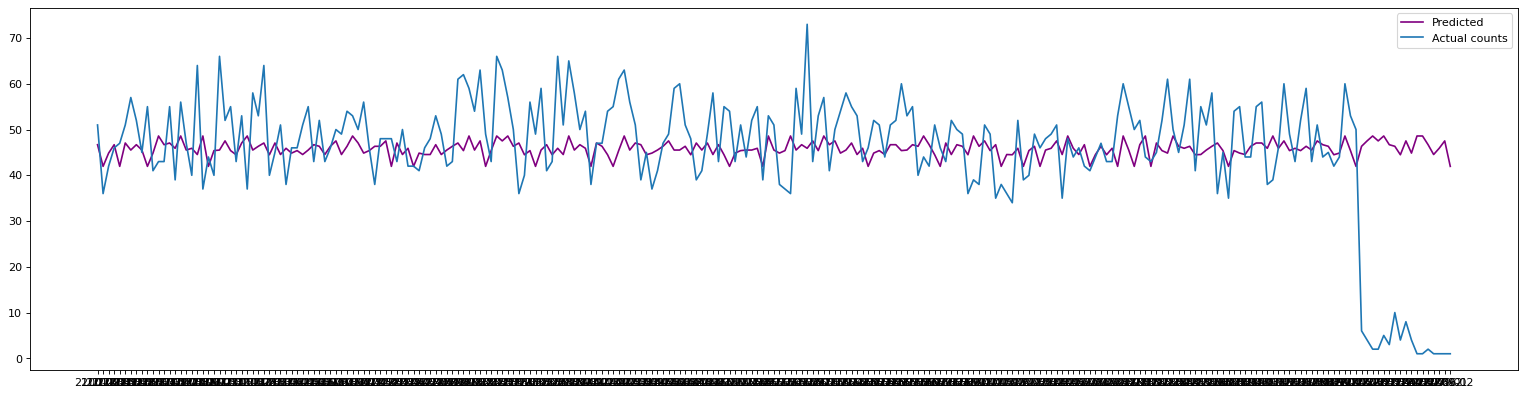

In [ ]:
monthly_predicted_counts=predictions_summary_frame_monthly['mean']
#monthly_predictions_summary_frame['obs_ci_upper']
monthly_actual_counts = y_test_month['Admissions']

fig = plt.figure()
plt.figure(figsize=(24, 6), dpi=80)
fig.suptitle('Predicted and Actual Monthly Admissions ')
predicted, = plt.plot(X_test_month.index, monthly_predicted_counts, color='purple', label = 'Predicted')
actual, = plt.plot(X_test_month.index, monthly_actual_counts, label='Actual counts')


plt.legend(handles=[predicted, actual])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


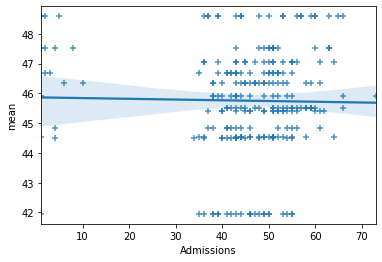

In [ ]:
sns.regplot(monthly_actual_counts, monthly_predicted_counts, marker="+")

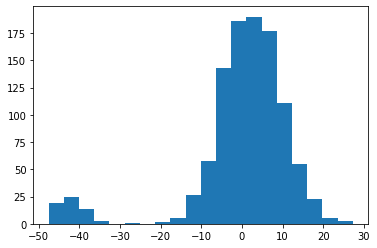

In [ ]:
plt.hist(olsr_month_results.resid, bins=20)
plt.show()

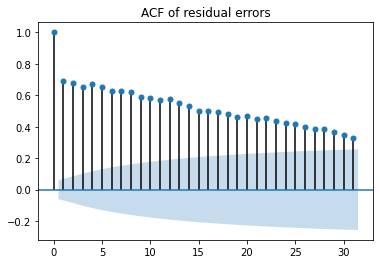

In [ ]:
plot_acf(olsr_month_results.resid, title='ACF of residual errors')
plt.show()

## ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df_month.Admissions, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.Admissions   No. Observations:                 1290
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4441.628
Method:                       css-mle   S.D. of innovations              7.566
Date:                Thu, 13 May 2021   AIC                           8893.256
Time:                        02:58:00   BIC                           8919.068
Sample:                             1   HQIC                          8902.945
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0258      0.039     -0.663      0.507      -0.102       0.050
ar.L1.D.Admissions     0.6204      0.308      2.017      0.044       0.018       1.223
ma.L1.D.Admissions  

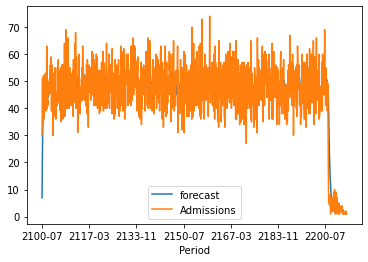

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
# target = df_month['Admissions']
# X = df_month
# X.drop('Admissions', axis = 1, inplace= True)
# X.head()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,target, random_state= 2, test_size = 0.2)
# print(f"Train shape {X_train.shape}")
# print(f"Test Shape {X_test.shape_}")

In [ ]:
# linear_model = LinearRegression()
# linear_model.fit(X_train,y_train)
# print(f"Coefficient/ Slope for {linear_model.coef_}")
# print("Intercept", linear_model.intercept_)
# predicted = linear_model.predict(X_test)
# sns.regplot(y_test,predicted)

In [ ]:
# fig = plt.figure()
# plt.figure(figsize=(24, 6), dpi=80)
# fig.suptitle('Predicted and Actual Monthly Admissions ')

# plt.plot(X_test.index[:25], predicted[:25], color='purple', linestyle='dashed', linewidth=2, label = 'Predicted')
# plt.plot(X_test.index[:25], y_test[:25], 'go-', label='Actual counts')
# #plt.legend(handles=[predicted, actual])

In [ ]:
# mse_linear_model = mean_squared_error(y_test,y_predicted)
# mae_linear_model = mean_absolute_error(y_test,y_predicted)

In [ ]:
# print(f"MSE for Linear Model {mse_linear_model}")
# print(f"MAE for Linear Model {mae_linear_model}")

In [ ]:
# sns.regplot(y_test,y_predicted)